In [157]:
english_to_french = [

    ("I am cold", "J'ai froid"),

    ("You are tired", "Tu es fatigué"),

    ("He is hungry", "Il a faim"),

    ("She is happy", "Elle est heureuse"),

    ("We are friends", "Nous sommes amis"),

    ("They are students", "Ils sont étudiants"),

    ("The cat is sleeping", "Le chat dort"),

    ("The sun is shining", "Le soleil brille"),

    ("We love music", "Nous aimons la musique"),

    ("She speaks French fluently", "Elle parle français couramment"),

    ("He enjoys reading books", "Il aime lire des livres"),

    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),

    ("The movie starts at 7 PM", "Le film commence à 19 heures"),

    ("She wears a red dress", "Elle porte une robe rouge"),

    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),

    ("He drives a blue car", "Il conduit une voiture bleue"),

    ("They visit museums often", "Ils visitent souvent des musées"),

    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),

    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),

    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),

    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),

    ("They travel around the world", "Ils voyagent autour du monde"),

    ("The book is on the table", "Le livre est sur la table"),

    ("She dances gracefully", "Elle danse avec grâce"),

    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),

    ("He works hard every day", "Il travaille dur tous les jours"),

    ("They speak different languages", "Ils parlent différentes langues"),

    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),

    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),

    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),

    ("The dog barks loudly", "Le chien aboie bruyamment"),

    ("He sings beautifully", "Il chante magnifiquement"),

    ("They swim in the pool", "Ils nagent dans la piscine"),

    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),

    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),

    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),

    ("He paints landscapes", "Il peint des paysages"),

    ("They laugh at the joke", "Ils rient de la blague"),

    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),

    ("She runs in the park", "Elle court dans le parc"),

    ("We travel by train", "Nous voyageons en train"),

    ("He writes a letter", "Il écrit une lettre"),

    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),

    ("The baby cries", "Le bébé pleure"),

    ("She studies hard for exams", "Elle étudie dur pour les examens"),

    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),

    ("He fixes the car", "Il répare la voiture"),

    ("They drink coffee in the morning", "Ils boivent du café le matin"),

    ("The sun sets in the evening", "Le soleil se couche le soir"),

    ("She dances at the party", "Elle danse à la fête"),

    ("We play music at the concert", "Nous jouons de la musique au concert"),

    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),

    ("They study French grammar", "Ils étudient la grammaire française"),

    ("The rain falls gently", "La pluie tombe doucement"),

    ("She sings a song", "Elle chante une chanson"),

    ("We watch a movie together", "Nous regardons un film ensemble"),

    ("He sleeps deeply", "Il dort profondément"),

    ("They travel to Paris", "Ils voyagent à Paris"),

    ("The children play in the park", "Les enfants jouent dans le parc"),

    ("She walks along the beach", "Elle se promène le long de la plage"),

    ("We talk on the phone", "Nous parlons au téléphone"),

    ("He waits for the bus", "Il attend le bus"),

    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),

    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),

    ("She dreams of flying", "Elle rêve de voler"),

    ("We work in the office", "Nous travaillons au bureau"),

    ("He studies history", "Il étudie l'histoire"),

    ("They listen to the radio", "Ils écoutent la radio"),

    ("The wind blows gently", "Le vent souffle doucement"),

    ("She swims in the ocean", "Elle nage dans l'océan"),

    ("We dance at the wedding", "Nous dansons au mariage"),

    ("He climbs the mountain", "Il gravit la montagne"),

    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),

    ("The cat meows loudly", "Le chat miaule bruyamment"),

    ("She paints a picture", "Elle peint un tableau"),

    ("We build a sandcastle", "Nous construisons un château de sable"),

    ("He sings in the choir", "Il chante dans le chœur")

]

Epoch 1, Train Loss: 2.3959, Val Loss: 1.4786
Epoch 2, Train Loss: 1.7821, Val Loss: 1.4709
Epoch 3, Train Loss: 1.5431, Val Loss: 1.8817
Epoch 4, Train Loss: 1.7370, Val Loss: 2.1978
Epoch 5, Train Loss: 1.6721, Val Loss: 1.5756
Epoch 6, Train Loss: 1.6437, Val Loss: 1.9665
Epoch 7, Train Loss: 1.6920, Val Loss: 2.0335
Epoch 8, Train Loss: 1.6638, Val Loss: 1.7629
Epoch 9, Train Loss: 1.6400, Val Loss: 2.0676
Epoch 10, Train Loss: 1.6046, Val Loss: 2.6678
Epoch 11, Train Loss: 1.5935, Val Loss: 2.3794
Epoch 12, Train Loss: 1.5606, Val Loss: 2.2203
Epoch 13, Train Loss: 1.4904, Val Loss: 2.5530
Epoch 14, Train Loss: 1.4984, Val Loss: 2.6728
Epoch 15, Train Loss: 1.5118, Val Loss: 2.5419
Epoch 16, Train Loss: 1.4371, Val Loss: 2.6444
Epoch 17, Train Loss: 1.3220, Val Loss: 2.6440
Epoch 18, Train Loss: 1.3189, Val Loss: 2.7587
Epoch 19, Train Loss: 1.3969, Val Loss: 2.8682
Epoch 20, Train Loss: 1.2083, Val Loss: 2.7145
Epoch 21, Train Loss: 1.1896, Val Loss: 2.8720
Epoch 22, Train Loss: 

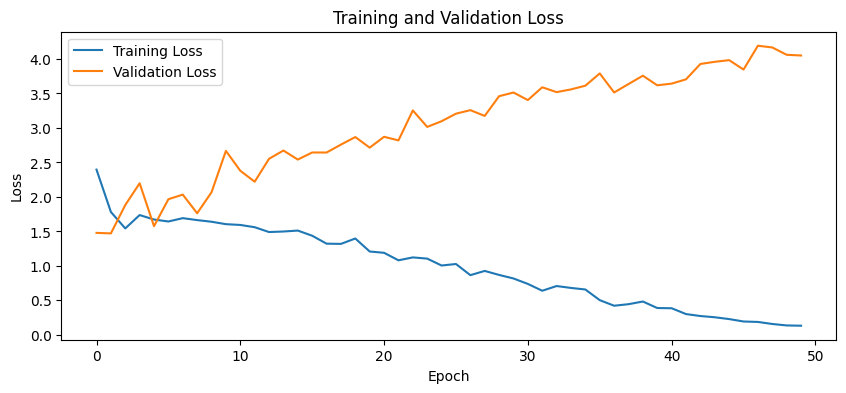

Translated: heureuse grâce travaille musique dur tous


In [158]:
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

class Vocabulary:
    def __init__(self):
        self.word2index = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2}
        self.index2word = {0: "<PAD>", 1: "<SOS>", 2: "<EOS>"}
        self.word_count = {}
        self.n_words = 3  # Start counting from 3 to account for special tokens

    def add_sentence(self, sentence):
        for word in sentence.split(' '):
            self.add_word(word)

    def add_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.index2word[self.n_words] = word
            self.word_count[word] = 1
            self.n_words += 1
        else:
            self.word_count[word] += 1

def tokenize_and_pad(sentences, vocab):
    if isinstance(sentences, str):  # Handle single sentence
        sentences = [sentences]

    max_length = max(len(sentence.split(' ')) for sentence in sentences) + 2  # +2 for SOS and EOS tokens
    tokenized_sentences = []
    for sentence in sentences:
        tokens = [vocab.word2index["<SOS>"]] + [vocab.word2index[word] for word in sentence.split(' ')] + [vocab.word2index["<EOS>"]]
        padded_tokens = tokens + [vocab.word2index["<PAD>"]] * (max_length - len(tokens))
        tokenized_sentences.append(torch.tensor(padded_tokens, dtype=torch.long))
    return tokenized_sentences

class EngFrDataset(Dataset):
    def __init__(self, pairs):
        self.eng_vocab = Vocabulary()
        self.fr_vocab = Vocabulary()
        self.pairs = []

        for eng, fr in pairs:
            self.eng_vocab.add_sentence(eng)
            self.fr_vocab.add_sentence(fr)
            self.pairs.append((eng, fr))

        self.eng_sentences = [pair[0] for pair in self.pairs]
        self.fr_sentences = [pair[1] for pair in self.pairs]
        
        self.eng_tokens = tokenize_and_pad(self.eng_sentences, self.eng_vocab)
        self.fr_tokens = tokenize_and_pad(self.fr_sentences, self.fr_vocab)

        self.eng_embedding = nn.Embedding(self.eng_vocab.n_words, 100)
        self.fr_embedding = nn.Embedding(self.fr_vocab.n_words, 100)

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        eng_tokens = self.eng_tokens[idx]
        fr_tokens = self.fr_tokens[idx]
        eng_emb = self.eng_embedding(eng_tokens)
        fr_emb = self.fr_embedding(fr_tokens)
        return eng_tokens, fr_tokens, eng_emb, fr_emb

class EncoderGRU(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderGRU, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size)
    
class DecoderGRU(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderGRU, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input).view(1, 1, -1)
        output = torch.relu(output)
        output, hidden = self.gru(output, hidden)
        output = self.softmax(self.out(output[0]))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size)
    
dataset = EngFrDataset(english_to_french)
train_pairs, val_pairs = train_test_split(dataset.pairs, test_size=0.2) 

train_dataset = EngFrDataset(train_pairs)
val_dataset = EngFrDataset(val_pairs)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=1)


def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, target_vocab, max_length, teacher_forcing_ratio):
    encoder_hidden = encoder.initHidden()
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()
    loss = 0

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size)  # Adjusted size

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[target_vocab.word2index['<SOS>']]], device=input_tensor.device)
    decoder_hidden = encoder_hidden  # Adjusted assignment

    use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False

    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(
            decoder_input, decoder_hidden
        )
        if use_teacher_forcing:
            decoder_input = target_tensor[di]  # Teacher forcing
        else:
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()

        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == target_vocab.word2index['<EOS>']:
            break

    loss.backward()
    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

def evaluate(encoder, decoder, sentence, input_vocab, output_vocab, max_length):
    with torch.no_grad():
        input_tensor = tokenize_and_pad([sentence], input_vocab)[0]
        input_length = input_tensor.size(0)
        encoder_hidden = encoder.initHidden()

        encoder_outputs = torch.zeros(max_length, encoder.hidden_size)  # Corrected size

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]

        decoder_input = torch.tensor([[output_vocab.word2index['<SOS>']]])  # SOS token
        decoder_hidden = encoder_hidden  # Corrected assignment

        decoded_words = []

        for di in range(max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.data.topk(1)
            if topi.item() == output_vocab.word2index['<EOS>']:
                break
            else:
                decoded_words.append(output_vocab.index2word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return ' '.join(decoded_words)
    
def evaluate_loss(input_tensor, target_tensor, encoder, decoder, criterion, target_vocab, max_length):
    with torch.no_grad():
        encoder_hidden = encoder.initHidden()
        encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

        for ei in range(input_tensor.size(0)):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]

        decoder_input = torch.tensor([[target_vocab.word2index['<SOS>']]], device=input_tensor.device)
        decoder_hidden = encoder_hidden

        loss = 0
        for di in range(target_tensor.size(0)):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.topk(1)
            decoder_input = topi.squeeze().detach()

            loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
            if decoder_input.item() == target_vocab.word2index['<EOS>']:
                break
                

        return loss.item() / target_tensor.size(0)
        
 

def clean_translation(translation):
    return translation.replace('<SOS>', '').replace('<EOS>', '').strip()

hidden_size = 256
encoder = EncoderGRU(dataset.eng_vocab.n_words, hidden_size)
decoder = DecoderGRU(hidden_size, dataset.fr_vocab.n_words)

encoder_optimizer = optim.SGD(encoder.parameters(), lr=0.01)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=0.01)
criterion = nn.NLLLoss()

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []


# Training loop with validation
for epoch in range(50):
    total_train_loss = 0
    for eng_tokens, fr_tokens, _, _ in train_dataloader:
        loss = train(eng_tokens.squeeze(0), fr_tokens.squeeze(0), encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, dataset.fr_vocab, max_length=10, teacher_forcing_ratio=0.5)
        total_train_loss += loss

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    total_val_loss = 0
    for eng_tokens, fr_tokens, _, _ in val_dataloader:
        loss = evaluate_loss(eng_tokens.squeeze(0), fr_tokens.squeeze(0), encoder, decoder, criterion, dataset.fr_vocab, max_length=10)
        total_val_loss += loss

    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)
    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

# Plot training and validation loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Translate a sentence
sentence = "I am hungry"
translated_sentence = evaluate(encoder, decoder, sentence, dataset.eng_vocab, dataset.fr_vocab, max_length=10)
print('Translated:', clean_translation(translated_sentence))


In [160]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from collections import Counter
import torch.nn.functional as F

def tokenize(text):
    return text.lower().split()

def build_vocab(sentences):
    tokens = [token for sentence in sentences for token in sentence]
    vocab = {'<pad>': 0, '<sos>': 1, '<eos>': 2}
    vocab.update({token: i+3 for i, token in enumerate(set(tokens))})
    return vocab

# Custom dataset class
class TranslationDataset(Dataset):
    def __init__(self, src_sentences, tgt_sentences, src_vocab, tgt_vocab):
        self.src_sentences = [[src_vocab[token] for token in ['<sos>'] + sentence + ['<eos>']] for sentence in src_sentences]
        self.tgt_sentences = [[tgt_vocab[token] for token in ['<sos>'] + sentence + ['<eos>']] for sentence in tgt_sentences]

    def __len__(self):
        return len(self.src_sentences)

    def __getitem__(self, idx):
        src_sentence = self.src_sentences[idx]
        tgt_sentence = self.tgt_sentences[idx]
        return torch.tensor(src_sentence, dtype=torch.long), torch.tensor(tgt_sentence, dtype=torch.long)

# Tokenize and build vocab
tokenized_en = [tokenize(en) for en, fr in english_to_french]
tokenized_fr = [tokenize(fr) for en, fr in english_to_french]
en_vocab = build_vocab(tokenized_en)
fr_vocab = build_vocab(tokenized_fr)
rev_fr_vocab = {v: k for k, v in fr_vocab.items()}


train_dataset = TranslationDataset(tokenized_en, tokenized_fr, en_vocab, fr_vocab)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False)

# Encoder definition
class EncoderGRU(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers=1, dropout=0):
        super(EncoderGRU, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers, dropout=dropout)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(self.n_layers, 1, self.hidden_size)

class Attention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Linear(hidden_size, 1, bias=False)

    def forward(self, hidden, encoder_outputs):
        # hidden: [1, batch size, hid dim], encoder_outputs: [src len, batch size, hid dim]
        src_len = encoder_outputs.shape[0]
        hidden = hidden.repeat(src_len, 1, 1)
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))
        attention = self.v(energy).squeeze(2)
        return F.softmax(attention, dim=0)

class AttnDecoderGRU(nn.Module):
    def __init__(self, output_size, hidden_size, n_layers=1, dropout_p=0.1):
        super(AttnDecoderGRU, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.n_layers = n_layers

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.dropout = nn.Dropout(dropout_p)
        self.attention = Attention(hidden_size)
        self.gru = nn.GRU(hidden_size + hidden_size, hidden_size, n_layers, dropout=dropout_p)
        self.out = nn.Linear(hidden_size * 2, output_size)

    def forward(self, input, hidden, encoder_outputs):
        input = input.unsqueeze(0)
        embedded = self.dropout(self.embedding(input))
        attn_weights = self.attention(hidden, encoder_outputs)
        attn_applied = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs.permute(1, 0, 2))
        gru_input = torch.cat((embedded, attn_applied.permute(1, 0, 2)), dim=2)
        output, hidden = self.gru(gru_input, hidden)
        output = self.out(torch.cat((output.squeeze(0), attn_applied.squeeze(1)), dim=1))
        return F.log_softmax(output, dim=1), hidden


# Initialize models, optimizers, and loss function
enc = EncoderGRU(len(en_vocab), 256, 2, 0.5)
dec = DecoderGRU(len(fr_vocab), 256, 2, 0.5)
enc_optimizer = optim.SGD(enc.parameters(), lr=0.01)
dec_optimizer = optim.SGD(dec.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=50):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    loss = 0
    correct = 0  # To calculate accuracy

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[fr_vocab['<sos>']]])
    decoder_hidden = encoder_hidden

    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()

        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == target_tensor[di].item():
            correct += 1

        if decoder_input.item() == fr_vocab['<eos>']:
            break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    accuracy = correct / target_length  # Calculate accuracy

    return loss.item() / target_length, accuracy

# Validation function
def validate(encoder, decoder, dataloader, criterion, max_length=50):
    encoder.eval()
    decoder.eval()
    total_loss = 0
    total_accuracy = 0

    with torch.no_grad():
        for src, tgt in dataloader:
            src, tgt = src.squeeze(0), tgt.squeeze(0)
            loss, accuracy = evaluate(src, tgt, encoder, decoder, criterion, max_length)
            total_loss += loss
            total_accuracy += accuracy

    avg_loss = total_loss / len(dataloader)
    avg_accuracy = total_accuracy / len(dataloader)
    return avg_loss, avg_accuracy

# Evaluate function
def evaluate(src_tensor, tgt_tensor, encoder, decoder, criterion, max_length=50):
    encoder_hidden = encoder.initHidden()
    input_length = src_tensor.size(0)
    target_length = tgt_tensor.size(0)
    loss = 0
    correct = 0

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(src_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[fr_vocab['<sos>']]])
    decoder_hidden = encoder_hidden

    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        topv, topi = decoder_output.topk(1)
        if topi.item() == tgt_tensor[di].item():
            correct += 1
        decoder_input = topi.squeeze().detach()

        loss += criterion(decoder_output, tgt_tensor[di].unsqueeze(0))
        if decoder_input.item() == fr_vocab['<eos>']:
            break

    accuracy = correct / target_length
    return loss.item(), accuracy

def train_loop(num_epochs, train_dataloader, val_dataloader, encoder, decoder, enc_optimizer, dec_optimizer, criterion):
    for epoch in range(num_epochs):
        total_train_loss = 0
        total_train_accuracy = 0

        encoder.train()
        decoder.train()
        for src, tgt in train_dataloader:
            src, tgt = src.squeeze(0), tgt.squeeze(0)
            loss, accuracy = train(src, tgt, encoder, decoder, enc_optimizer, dec_optimizer, criterion)
            total_train_loss += loss
            total_train_accuracy += accuracy

        avg_train_loss = total_train_loss / len(train_dataloader)
        avg_train_accuracy = total_train_accuracy / len(train_dataloader)

        # Validation phase with loss and accuracy
        avg_val_loss, avg_val_accuracy = validate(encoder, decoder, val_dataloader, criterion)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_accuracy:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_accuracy:.4f}')


# Train the model
train_loop(50, train_dataloader, val_dataloader, enc, dec, enc_optimizer, dec_optimizer, criterion)

# Translation function
def translate(sentence, encoder, decoder, src_vocab, tgt_vocab, rev_tgt_vocab, max_length=50):
    with torch.no_grad():
        input_tensor = [src_vocab[token] for token in tokenize(sentence)]
        input_tensor = torch.tensor(input_tensor, dtype=torch.long).view(-1, 1)

        encoder_hidden = encoder.initHidden()

        input_length = input_tensor.size(0)
        encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[tgt_vocab['<sos>']]])
        decoder_hidden = encoder_hidden

        decoded_words = []

        for di in range(max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            topv, topi = decoder_output.data.topk(1)

            if topi.item() == tgt_vocab['<eos>']:
                break  # Only break if <EOS> is genuinely predicted
            else:
                decoded_words.append(rev_tgt_vocab[topi.item()])

            decoder_input = topi.squeeze().detach()

        return ' '.join(decoded_words)

# Example translation
example_sentence = "The baby cries"
translated_sentence = translate(example_sentence, enc, dec, en_vocab, fr_vocab, rev_fr_vocab)
print(f'Translated: {translated_sentence}')

Epoch 1/50, Train Loss: 3.3419, Train Accuracy: 0.1514, Val Loss: 27.6879, Val Accuracy: 0.1741
Epoch 2/50, Train Loss: 2.5450, Train Accuracy: 0.1748, Val Loss: 17.4592, Val Accuracy: 0.2181
Epoch 3/50, Train Loss: 2.3012, Train Accuracy: 0.1936, Val Loss: 16.7099, Val Accuracy: 0.2244
Epoch 4/50, Train Loss: 2.2940, Train Accuracy: 0.1991, Val Loss: 18.7184, Val Accuracy: 0.2529
Epoch 5/50, Train Loss: 2.3886, Train Accuracy: 0.2031, Val Loss: 16.0489, Val Accuracy: 0.2330
Epoch 6/50, Train Loss: 2.4231, Train Accuracy: 0.2158, Val Loss: 15.7946, Val Accuracy: 0.2244
Epoch 7/50, Train Loss: 2.4052, Train Accuracy: 0.2247, Val Loss: 14.8404, Val Accuracy: 0.2022
Epoch 8/50, Train Loss: 2.4663, Train Accuracy: 0.2262, Val Loss: 15.2963, Val Accuracy: 0.2445
Epoch 9/50, Train Loss: 2.4737, Train Accuracy: 0.2155, Val Loss: 15.0975, Val Accuracy: 0.2369
Epoch 10/50, Train Loss: 2.4323, Train Accuracy: 0.2480, Val Loss: 15.0129, Val Accuracy: 0.2290
Epoch 11/50, Train Loss: 2.3839, Train 

In [162]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from collections import Counter
import torch.nn.functional as F

def tokenize(text):
    return text.lower().split()

def build_vocab(sentences):
    tokens = [token for sentence in sentences for token in sentence]
    vocab = {'<pad>': 0, '<sos>': 1, '<eos>': 2}
    vocab.update({token: i+3 for i, token in enumerate(set(tokens))})
    return vocab

# Custom dataset class
class TranslationDataset(Dataset):
    def __init__(self, src_sentences, tgt_sentences, src_vocab, tgt_vocab):
        self.src_sentences = [[src_vocab[token] for token in ['<sos>'] + sentence + ['<eos>']] for sentence in src_sentences]
        self.tgt_sentences = [[tgt_vocab[token] for token in ['<sos>'] + sentence + ['<eos>']] for sentence in tgt_sentences]

    def __len__(self):
        return len(self.src_sentences)

    def __getitem__(self, idx):
        src_sentence = self.src_sentences[idx]
        tgt_sentence = self.tgt_sentences[idx]
        return torch.tensor(src_sentence, dtype=torch.long), torch.tensor(tgt_sentence, dtype=torch.long)

french_to_english = [(fr, en) for en, fr in english_to_french]

# Tokenize and prepare the dataset
tokenized_fr = [tokenize(fr) for fr, _ in french_to_english]
tokenized_en = [tokenize(en) for _, en in french_to_english]

fr_vocab = build_vocab(tokenized_fr)
en_vocab = build_vocab(tokenized_en)
rev_en_vocab = {v: k for k, v in en_vocab.items()}

train_dataset = TranslationDataset(tokenized_fr, tokenized_en, fr_vocab, en_vocab)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False)

# Encoder definition
class EncoderGRU(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers=1, dropout=0):
        super(EncoderGRU, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers, dropout=dropout)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(self.n_layers, 1, self.hidden_size)

class Attention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Linear(hidden_size, 1, bias=False)

    def forward(self, hidden, encoder_outputs):
        # hidden: [1, batch size, hid dim], encoder_outputs: [src len, batch size, hid dim]
        src_len = encoder_outputs.shape[0]
        hidden = hidden.repeat(src_len, 1, 1)
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))
        attention = self.v(energy).squeeze(2)
        return F.softmax(attention, dim=0)

class AttnDecoderGRU(nn.Module):
    def __init__(self, output_size, hidden_size, n_layers=1, dropout_p=0.1):
        super(AttnDecoderGRU, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.n_layers = n_layers

        self.embedding = nn.Embedding(output_size, hidden_size)
        self.dropout = nn.Dropout(dropout_p)
        self.attention = Attention(hidden_size)
        self.gru = nn.GRU(hidden_size + hidden_size, hidden_size, n_layers, dropout=dropout_p)
        self.out = nn.Linear(hidden_size * 2, output_size)

    def forward(self, input, hidden, encoder_outputs):
        input = input.unsqueeze(0)
        embedded = self.dropout(self.embedding(input))
        attn_weights = self.attention(hidden, encoder_outputs)
        attn_applied = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs.permute(1, 0, 2))
        gru_input = torch.cat((embedded, attn_applied.permute(1, 0, 2)), dim=2)
        output, hidden = self.gru(gru_input, hidden)
        output = self.out(torch.cat((output.squeeze(0), attn_applied.squeeze(1)), dim=1))
        return F.log_softmax(output, dim=1), hidden


# Initialize models, optimizers, and loss function
enc = EncoderGRU(len(en_vocab), 256, 2, 0.5)
dec = DecoderGRU(len(fr_vocab), 256, 2, 0.5)
enc_optimizer = optim.SGD(enc.parameters(), lr=0.01)
dec_optimizer = optim.SGD(dec.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=50):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    loss = 0
    correct = 0  # To calculate accuracy
    
    # Add this inside your train function, right before the loop over input_length starts
    max_input_index = torch.max(input_tensor).item()
    print(f"Max input index: {max_input_index}, Embedding size: {enc.embedding.num_embeddings}")

# Do the same for the target tensor if necessary
    max_target_index = torch.max(target_tensor).item()
    print(f"Max target index: {max_target_index}, Embedding size: {dec.embedding.num_embeddings}")


    encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[fr_vocab['<sos>']]])
    decoder_hidden = encoder_hidden

    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()

        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == target_tensor[di].item():
            correct += 1

        if decoder_input.item() == fr_vocab['<eos>']:
            break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    accuracy = correct / target_length  # Calculate accuracy

    return loss.item() / target_length, accuracy

# Validation function
def validate(encoder, decoder, dataloader, criterion, max_length=50):
    encoder.eval()
    decoder.eval()
    total_loss = 0
    total_accuracy = 0

    with torch.no_grad():
        for src, tgt in dataloader:
            src, tgt = src.squeeze(0), tgt.squeeze(0)
            loss, accuracy = evaluate(src, tgt, encoder, decoder, criterion, max_length)
            total_loss += loss
            total_accuracy += accuracy

    avg_loss = total_loss / len(dataloader)
    avg_accuracy = total_accuracy / len(dataloader)
    return avg_loss, avg_accuracy

# Evaluate function
def evaluate(src_tensor, tgt_tensor, encoder, decoder, criterion, max_length=50):
    encoder_hidden = encoder.initHidden()
    input_length = src_tensor.size(0)
    target_length = tgt_tensor.size(0)
    loss = 0
    correct = 0

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(src_tensor[ei], encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[fr_vocab['<sos>']]])
    decoder_hidden = encoder_hidden

    for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        topv, topi = decoder_output.topk(1)
        if topi.item() == tgt_tensor[di].item():
            correct += 1
        decoder_input = topi.squeeze().detach()

        loss += criterion(decoder_output, tgt_tensor[di].unsqueeze(0))
        if decoder_input.item() == fr_vocab['<eos>']:
            break

    accuracy = correct / target_length
    return loss.item(), accuracy

def train_loop(num_epochs, train_dataloader, val_dataloader, encoder, decoder, enc_optimizer, dec_optimizer, criterion):
    for epoch in range(num_epochs):
        total_train_loss = 0
        total_train_accuracy = 0

        encoder.train()
        decoder.train()
        for src, tgt in train_dataloader:
            src, tgt = src.squeeze(0), tgt.squeeze(0)
            loss, accuracy = train(src, tgt, encoder, decoder, enc_optimizer, dec_optimizer, criterion)
            total_train_loss += loss
            total_train_accuracy += accuracy

        avg_train_loss = total_train_loss / len(train_dataloader)
        avg_train_accuracy = total_train_accuracy / len(train_dataloader)

        avg_val_loss, avg_val_accuracy = validate(encoder, decoder, val_dataloader, criterion)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_accuracy:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {avg_val_accuracy:.4f}')



# Train the model
train_loop(50, train_dataloader, val_dataloader, enc, dec, enc_optimizer, dec_optimizer, criterion)

# Translation function
def translate(sentence, encoder, decoder, src_vocab, tgt_vocab, rev_tgt_vocab, max_length=50):
    with torch.no_grad():
        input_tensor = [src_vocab[token] for token in tokenize(sentence)]
        input_tensor = torch.tensor(input_tensor, dtype=torch.long).view(-1, 1)
        encoder_hidden = encoder.initHidden()
        encoder_outputs = torch.zeros(max_length, encoder.hidden_size)

        for ei in range(input_tensor.size(0)):
            encoder_output, encoder_hidden = encoder(input_tensor[ei], encoder_hidden)
            encoder_outputs[ei] += encoder_output[0, 0]

        decoder_input = torch.tensor([[tgt_vocab['<sos>']]])
        decoder_hidden = encoder_hidden
        decoded_words = []

        for di in range(max_length):
            decoder_output, decoder_hidden, _ = decoder(decoder_input, decoder_hidden, encoder_outputs)
            topv, topi = decoder_output.data.topk(1)

            if topi.item() == tgt_vocab['<eos>']:
                break
            else:
                decoded_words.append(rev_tgt_vocab[topi.item()])

            decoder_input = topi.squeeze().detach()

        return ' '.join(decoded_words)
    
french_sentences = [ "Je suis fatigué.",]
for sentence in french_sentences:
    translated_sentence = translate(sentence, enc, dec, fr_vocab, en_vocab, rev_en_vocab)
    print(f'French: {sentence}\nTranslated: {translated_sentence}\n')

Max input index: 196, Embedding size: 186
Max target index: 185, Embedding size: 202


IndexError: index out of range in self